In [1]:

import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
#
import os

# Load the data

In [2]:
# Path to FITRES file
fitres_file = 'BBC1D_fixgamma0.FITRES'

# Display the first few lines of the file to understand its structure
with open(fitres_file, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # Print the first 10 lines
        print(line)

# Reading the file
df1 = pd.read_csv(fitres_file, sep='\s+', comment='#')

# Display the DataFrame
print(df1)


# VERSION_PHOTOMETRY(DATA):     DES5YR_SMP 

# VERSION_PHOTOMETRY(BIASCOR):   

# ISDATA_REAL:   1 

# SNANA_VERSION: v11_05n-95-g0136620 

# BBC_VERSION:   4 



# MIGRAD

# NCALL_FCN: 4641 

# CPU: 0.03 minutes

# MU-RESIDUAL NOTE: MURES = MU-(MUMODEL+M0DIF) 

     VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
0          SN:  1562098  1562098        10     0    X2              3   
1          SN:  1702083  1702083        10     0    C2              3   
2          SN:  1435094  1435094        10     0    C3              3   
3          SN:  1309227  1309227        10     0    C3              3   
4          SN:  1324542  1324542        10     1    C2              3   
...        ...      ...      ...       ...   ...   ...            ...   
1528       SN:  1263369  1263369        10     1    S1              3   
1529       SN:  1265040  1265040        10     0    X1              3   
1530       SN:  1265231  1265231        10     0    X3              3   
1531   

In [3]:
#dataframe 2 to extract the value of logOII
file_path2 = 'ozdes_oII.csv'

df2 = pd.read_csv(file_path2)

print(df2)

         CID                ID_Host    SPECZ   LOG_OII  LOG_OII_ERR  \
0    1644213  SVA1_COADD-2970925362  0.54622  0.534193     0.489119   
1    1321492  SVA1_COADD-2971237980  0.55583  0.878993     0.558391   
2    1896213  SVA1_COADD-2939364126  0.68757  0.744288     0.406872   
3    1266255  SVA1_COADD-2939020332  0.29461  1.360995     0.308512   
4    1279501  SVA1_COADD-2938843264  0.56655  1.072554     0.226491   
..       ...                    ...      ...       ...          ...   
702  1315910  SVA1_COADD-2971194265  0.39468  1.200865     0.020877   
703  1293758  SVA1_COADD-2971162315  0.14896  0.696004     0.036102   
704  1371046  SVA1_COADD-2970563097  0.07411  1.266460     0.020367   
705  1280240  SVA1_COADD-2940046706  0.05999  1.190911     0.017438   
706  1344303  SVA1_COADD-2925680159  0.09475  1.464891     0.012141   

     HOST_LOGMASS  HOST_LOGMASS_ERR   U-R  
0           10.46              0.04  1.29  
1           10.43              0.04  1.29  
2           11.

In [4]:
#dataframe foundation 
#dataframe foundation 
file_path_fond1 = 'Foundation_Master_File.csv'
dff1 = pd.read_csv(file_path_fond1)
dff1_main= dff1[['mu_res_x1_c','SN','OII_EW','zHD', 'mu_err_x1_c']]
print(dff1_main)
# Drop rows where 'OII_EW' is NaN
dff1_main_non_nan = dff1_main.dropna(subset=['OII_EW'])
#find median redshift
redshift=dff1_main_non_nan['zHD']
med_redshift=np.median(redshift)
file_path_fond2 = 'FN_Host_Properties-3.csv'
dff2 = pd.read_csv(file_path_fond2)
print(dff1_main_non_nan)

     mu_res_x1_c           SN    OII_EW      zHD  mu_err_x1_c
0       0.022315    SN2016coj       NaN  0.00570     0.482154
1      -0.024013       2018gv       NaN  0.00602     0.348138
2       0.278647       2019np       NaN  0.00648     0.320006
3      -0.103493      2017erp       NaN  0.00677     0.369122
4       0.010428  ASASSN-15so       NaN  0.00857     0.264834
..           ...          ...       ...      ...          ...
174     0.248538    Gaia16acv       NaN  0.07859     0.140942
175    -0.208416      PS15bzz  0.955859  0.07931     0.142165
176    -0.016114    SN2016glp       NaN  0.08410     0.218094
177    -0.093876    SN2016grz       NaN  0.08704     0.213306
178     0.130085     iPTF17dz       NaN  0.09293     0.491364

[179 rows x 5 columns]
     mu_res_x1_c           SN     OII_EW      zHD  mu_err_x1_c
6       0.323816  ASASSN-16jf  14.490026  0.01096     0.312508
9       0.041139  ASASSN-16la  19.912591  0.01424     0.262721
10      0.310454  PSNJ2043531   7.084661  0

Extracting values from the data

In [5]:
#constant for hubble residuals
alpha= 0.15903
beta= 2.72633
M= -19.3755
#parameter extracted from dataframe 1 to compute hubble residuals
mB = df1['mB']
x1 = df1['x1']
c = df1['c']
biascorr= df1['biasCor_mu']
z= df1['zHD']

In [6]:
#compute hubble residuals
mu= mB - M - beta*c + alpha*x1 - biascorr
#add mu to dataframe 1
df1['mu'] = mu
print(mu)


0       42.834612
1       41.703459
2       43.609198
3       44.286162
4       42.553988
          ...    
1528    41.078388
1529    41.441194
1530    42.923195
1531    41.606410
1532    39.766587
Length: 1533, dtype: float64


In [7]:
#calculate theoretical distance modulus
cosmo = FlatLambdaCDM(H0=70, Om0=0.315, Tcmb0=2.725)
distance_modulus = np.zeros(len(z))
# Define the redshift of the object
for i in range(len(z)):
    distance_modulus[i] = cosmo.distmod(z[i]).value
distance_modulus


array([42.61962048, 41.60297012, 44.12601   , ..., 43.07075829,
       41.58976092, 39.89703104])

In [8]:
#compute hubble residuals
delta_mu= mu- (distance_modulus + df1['M0DIF'])
#add to dataframe 1
df1['delta_mu'] = delta_mu
delta_mu

0       0.239492
1       0.104989
2      -0.534812
3       0.393175
4       0.120925
          ...   
1528    0.012826
1529   -0.432508
1530   -0.150063
1531    0.021149
1532   -0.169344
Length: 1533, dtype: float64

In [9]:
#compute hubble residuals
delta_mu_modif= mu- distance_modulus + df1['M0DIF']
#add to dataframe 1
df1['delta_mu_modif'] = delta_mu_modif

In [10]:
#additional: evaluating the difference of distance modulus calculated by me and from marcus data
mures= df1['MURES']
difference_data= abs(delta_mu-mures)
print('the difference of distance modulus calculated by me and marcus data:', difference_data)


the difference of distance modulus calculated by me and marcus data: 0       0.001892
1       0.000889
2       0.000988
3       0.000975
4       0.000825
          ...   
1528    0.001526
1529    0.001892
1530    0.001937
1531    0.001749
1532    0.000856
Length: 1533, dtype: float64


In [11]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
#merge df1 and df2 based on CID
#df_merged is final dataset
df_merged = df1.merge(df2[['CID','LOG_OII', 'LOG_OII_ERR','SPECZ']], on='CID')
#display variable from dataframe1
for col in df_merged.columns:
    print(col)
#i have 3 candidates for redshift, SPECZ, zHD, and zHEL
print(df_merged['SPECZ'])
print(df_merged['zHD'])
print(df_merged['delta_mu'])

VARNAMES:
CID
CIDint
IDSURVEY
TYPE
FIELD
CUTFLAG_SNANA
ERRFLAG_FIT
zHEL
zHELERR
zCMB
zCMBERR
zHD
zHDERR
VPEC
VPECERR
MWEBV
HOST_NMATCH
HOST_NMATCH2
HOST_OBJID
HOST_ZPHOT
HOST_ZPHOTERR
HOST_ZSPEC
HOST_ZSPECERR
HOST_RA
HOST_DEC
HOST_ANGSEP
HOST_DDLR
HOST_CONFUSION
HOST_LOGMASS
HOST_LOGMASS_ERR
HOST_SBFLUXCAL_g
HOST_SBFLUXCAL_r
HOST_SBFLUXCAL_i
HOST_SBFLUXCAL_z
HOST_SBMAG_g
HOST_SBMAG_r
HOST_SBMAG_i
HOST_SBMAG_z
PKMJDINI
SNRMAX1
SNRMAX2
SNRMAX3
PKMJD
PKMJDERR
x1
x1ERR
c
cERR
mB
mBERR
x0
x0ERR
COV_x1_c
COV_x1_x0
COV_c_x0
NDOF
FITCHI2
FITPROB
RA
DEC
HOST_ANGSEP_2
TGAPMAX
TrestMIN
TrestMAX
FLUXCALMAX_g
SNRMAX_g
FLUXCALMAX_r
SNRMAX_r
FLUXCALMAX_i
SNRMAX_i
FLUXCALMAX_z
SNRMAX_z
HOSTGAL_LOGMASS
HOSTGAL_LOGMASS_ERR
HOST_LOGSFR
HOST_LOGSFR_ERR
HOST_LOGsSFR
HOST_COLOR
HOST_LOGsSFR_ERR
HOST_COLOR_ERR
PROB_SCONE
PROB_SNIRFV19
PROB_SNNDESCC
PROB_SNNJ17
PROB_SNNV19
PROB_UNITY
CUTMASK
MU
MUMODEL
MUERR
MUERR_RENORM
MUERR_RAW
MUERR_VPEC
MURES
MUPULL
M0DIF
M0DIFERR
CHI2
biasCor_nevt
biasCor_mu
biasCorErr_

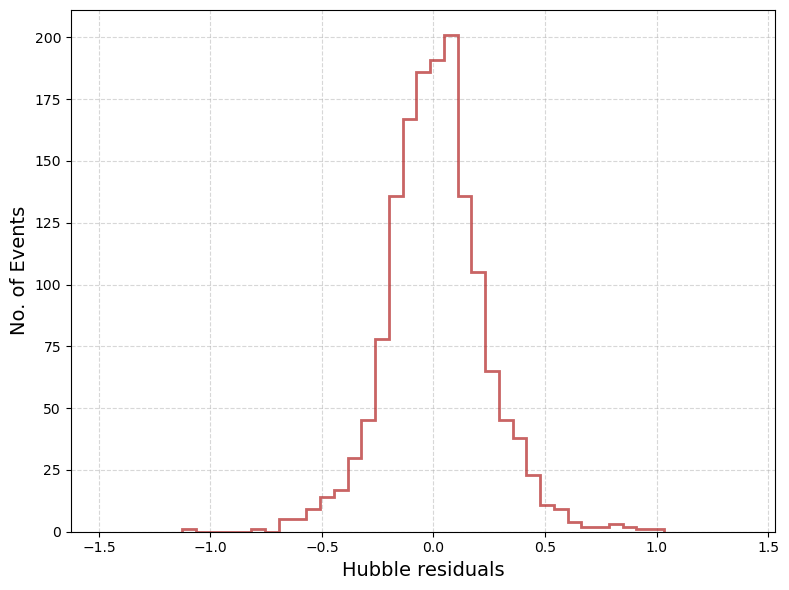

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(delta_mu, bins=35, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(delta_mu) - 0.5, np.max(delta_mu) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Hubble residuals', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


# Define function

In [13]:
#function:compute weighted average
def weighted_average(values, errors):
    """
    Calculate the weighted average of a list of values, where the weights are 1/(error^2).

    :param values: List of numerical values.
    :param errors: List of errors corresponding to the values.
    :return: The weighted average.
    """
    if len(values) != len(errors):
        raise ValueError("Values and errors must be of the same length.")
    
    # Calculate weights as 1/(error^2)
    weights = [1 / (error**2) for error in errors]
    
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    return weighted_sum / total_weight


#function: bootstrap resampling to compute the uncertainty
def create_bootstrap_samples_weighted(df, value_column, weight_column, sample_size=None, n_samples=1000):
    # If no sample_size is provided, use the entire DataFrame's length
    if sample_size is None:
        sample_size = len(df)
    
    # Create a list for sample weighted averages
    sample_weighted_averages = []
    
    # Loop n_samples times
    for _ in range(n_samples):
        # Create a bootstrap sample of sample_size with replacement
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        
        # Extract the values and weights from the bootstrap sample
        values = bootstrap_sample[value_column]
        weights = 1 / (bootstrap_sample[weight_column] ** 2)
        
        # Calculate the weighted average for the bootstrap sample
        weighted_average = np.average(values, weights=weights)
        
        # Add this weighted average to the list
        sample_weighted_averages.append(weighted_average)
    
    return pd.Series(sample_weighted_averages)

def intrinsic_error(error):
    sample_size = len(error)
    # Create a list for intrinsic error
    intrin_error = []
    # Loop over sample_size times
    for i in range(sample_size):
        weight = 1 / (error[i] ** 2)  # Calculate the weight for each error
        intrin_error.append(weight)   # Append each weight to the list
    
    # Calculate the final intrinsic error
    total_error = 1 / np.sqrt(sum(intrin_error))
    return total_error


# HUBBLE RESIDUALS VS EW[OII]

In [14]:

#find median of [OII]
oII= df_merged['LOG_OII']
med_oII= 1.25
print(med_oII)

#split data into two
oII_bm = df_merged[oII <= med_oII]
oII_am = df_merged[oII > med_oII]

# [OII] weighted average for below median 
oII_values_bm = oII_bm['delta_mu']
oII_weights_bm = oII_bm['MUERR']
oII_wa_bm = weighted_average(oII_values_bm, oII_weights_bm)
print(f"[OII]The weighted average below median is: {oII_wa_bm}")
#weighted average for above median
oII_values_am = oII_am['delta_mu']
oII_weights_am = oII_am['MUERR']
oII_wa_am = weighted_average(oII_values_am, oII_weights_am)
print(f"[OII] The weighted average above median is: {oII_wa_am}")

# [OII] uncertainty for below median
oIIbootstrap_bm = create_bootstrap_samples_weighted(oII_bm, 'delta_mu', 'MUERR')
oII_std_bm= np.std(oIIbootstrap_bm)
print("[OII] uncertainty for below median data:", oII_std_bm)
#uncertainty for above median
oIIbootstrap_am = create_bootstrap_samples_weighted(oII_am, 'delta_mu', 'MUERR')
oII_std_am= np.std(oIIbootstrap_am)
print("[OII] uncertainty for above median data:", oII_std_am)

#find corresponding x axis (median)
oIIx_bm=oII_bm['LOG_OII']
oII_x_bm= np.median(oIIx_bm)
oIIx_am=oII_am['LOG_OII']
oII_x_am= np.median(oIIx_am)

#extract axis for plot
#y axis for plot
dmu=df_merged['delta_mu']
#x axis for plot
oII= df_merged['LOG_OII']

#calculate the difference of hubble residuals
oII_step= oII_wa_am - oII_wa_bm
oII_step_err= np.sqrt((oII_std_am)**2 + (oII_std_bm)**2)
print("[OII] hubble residual diff:", oII_step)
print("[OII] the error of hubble residual diff:", oII_step_err)


1.25
[OII]The weighted average below median is: -0.035532918845893526
[OII] The weighted average above median is: 0.03849606421134649
[OII] uncertainty for below median data: 0.009062880816833718
[OII] uncertainty for above median data: 0.00914139316343385
[OII] hubble residual diff: 0.07402898305724001
[OII] the error of hubble residual diff: 0.01287248529494626


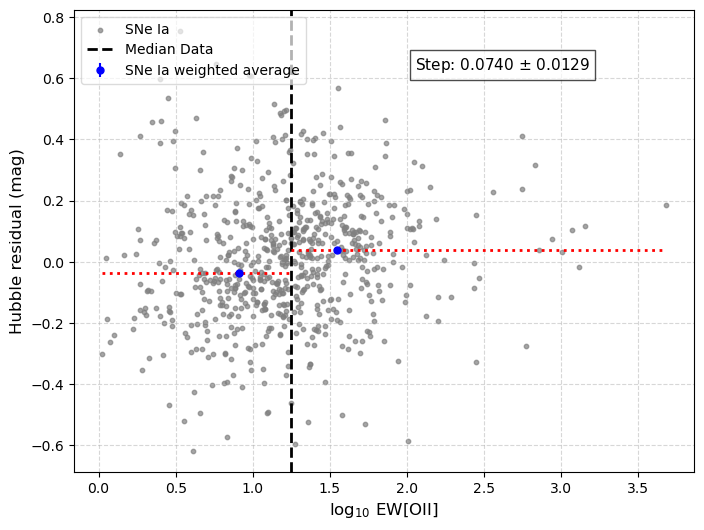

In [15]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(oII, dmu , s=10, color='gray', alpha=0.7, label='SNe Ia')

# Labels and titles
plt.xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=12)
plt.ylabel(r'Hubble residual (mag)', fontsize=12)
#plt.title(r'Hubble residuals vs $\log_{10} \, \mathrm{EW[OII]}$ ', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_oII, color='black', linestyle='--', lw=2, label='Median Data')
plt.hlines(oII_wa_bm, xmin=oII.min(), xmax=med_oII, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(oII_wa_am, xmin=med_oII, xmax=oII.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
plt.errorbar(oII_x_bm, oII_wa_bm, yerr=oII_std_bm, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
plt.errorbar(oII_x_am, oII_wa_am, yerr=oII_std_am, fmt='o', color='blue', markersize=5)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {oII_step:.4f} $\pm$ {oII_step_err:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Save plot as a PNG file (overwrite if exists)
file_path1 = 'hubble_residuals_vs_oII.png'
if os.path.isfile(file_path1):
    os.remove(file_path1)
plt.savefig(file_path1, dpi=300)

# Display the plot
plt.show()

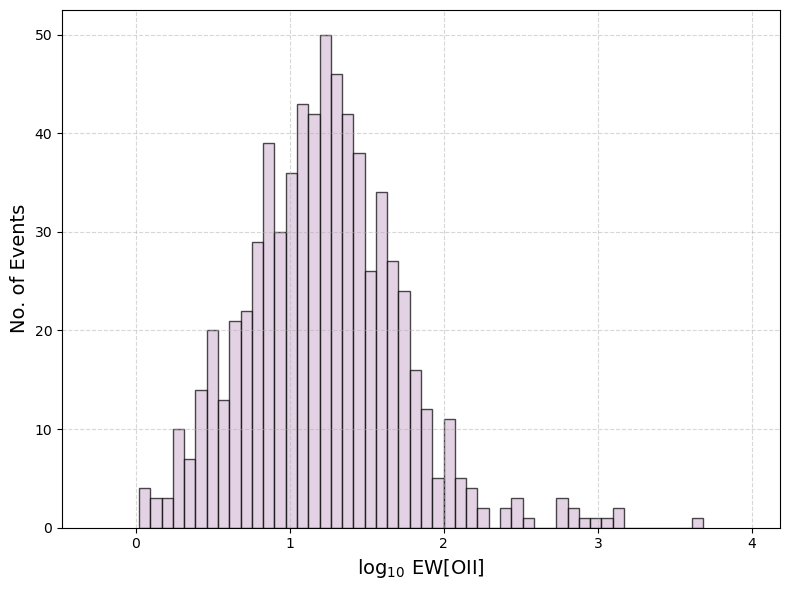

In [554]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(oII, bins=50, edgecolor='black', alpha=0.7, color='thistle')

# Set x-axis limits if needed
plt.xlim(np.min(oII) - 0.5, np.max(oII) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
# Save plot as a PNG file (overwrite if exists)
file_pathnum = 'oIIcounts.png'
if os.path.isfile(file_pathnum):
    os.remove(file_pathnum)
plt.savefig(file_pathnum, dpi=300)
plt.show()

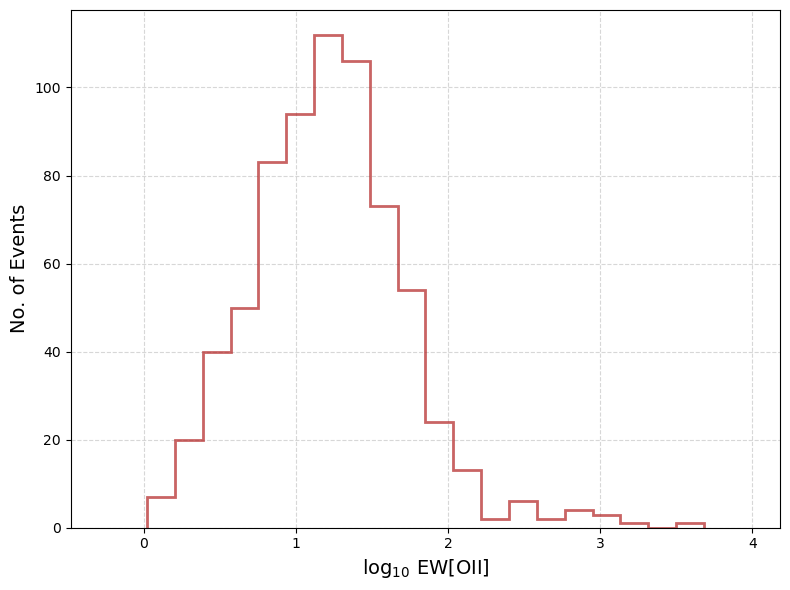

In [555]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(oII, bins=20, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(oII) - 0.5, np.max(oII) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


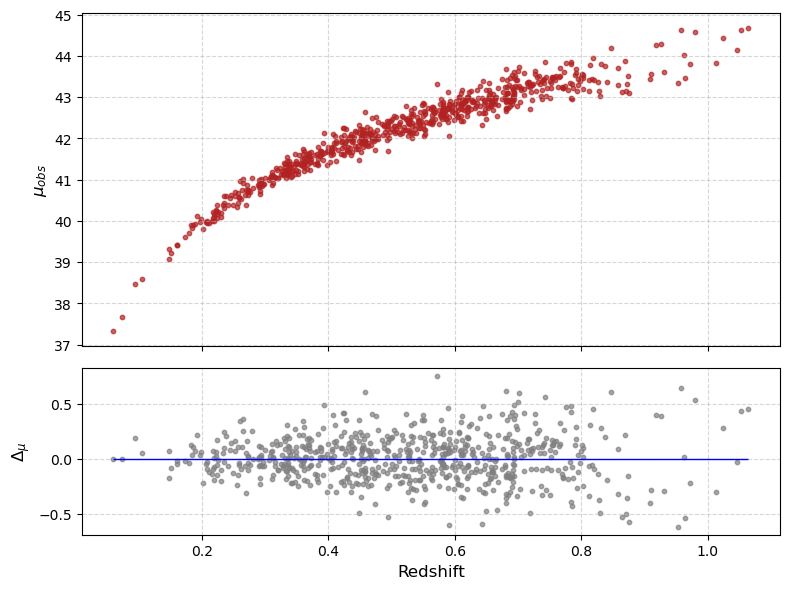

In [556]:
# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

# First plot: μ_obs vs redshift
ax1.scatter(df_merged['zHD'], df_merged['mu'], s=10, alpha=0.7, color='firebrick')
ax1.set_ylabel('$\mu_{obs}$', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Second plot: Δ_μ vs redshift
ax2.scatter(df_merged['zHD'], df_merged['delta_mu'], s=10, alpha=0.7, color='grey')
ax2.set_xlabel('Redshift', fontsize=12)
ax2.set_ylabel('$\Delta_{\mu}$', fontsize=12)
ax2.hlines(0, xmin=df_merged['zHD'].min(),xmax=df_merged['zHD'].max(), color='blue', linestyle='-', lw=1)  # Right side
ax2.grid(True, linestyle='--', alpha=0.5)

# Adjust the layout for a clean look
plt.tight_layout()
plt.show()

# EVALUATING DATA FOR DIFFERENCE dDLR

In [557]:

#splitting data based on dDLR value
dDLR= df_merged['HOST_DDLR']
dDLR_lt1= df_merged[dDLR < 1]
dDLR_gt1= df_merged[dDLR >= 1]
print(np.max(dDLR))

3.906


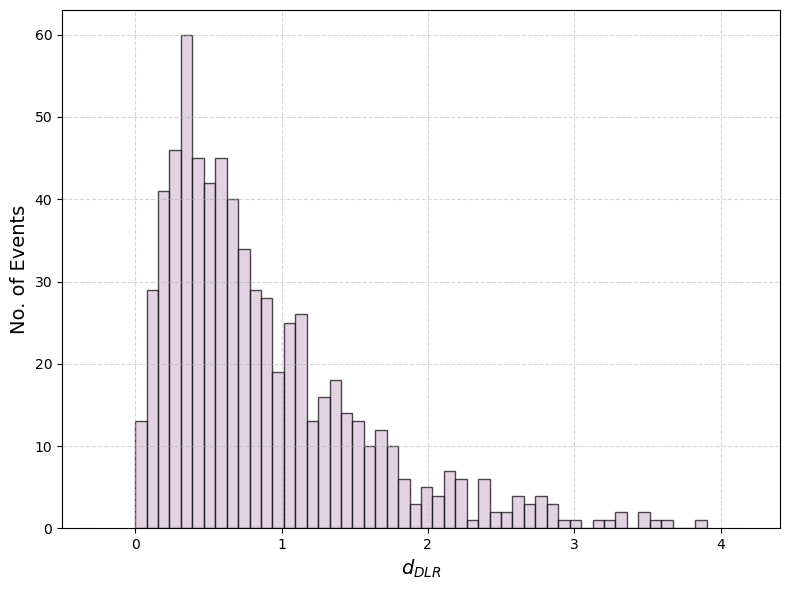

In [558]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(dDLR, bins=50, edgecolor='black', alpha=0.7, color='thistle')

# Set x-axis limits if needed
plt.xlim(np.min(dDLR) - 0.5, np.max(dDLR) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'$d_{DLR}$', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
# Save plot as a PNG file (overwrite if exists)
file_pathnumddlr = 'ddlrcounts.png'
if os.path.isfile(file_pathnumddlr):
    os.remove(file_pathnumddlr)
plt.savefig(file_pathnumddlr, dpi=300)
plt.show()

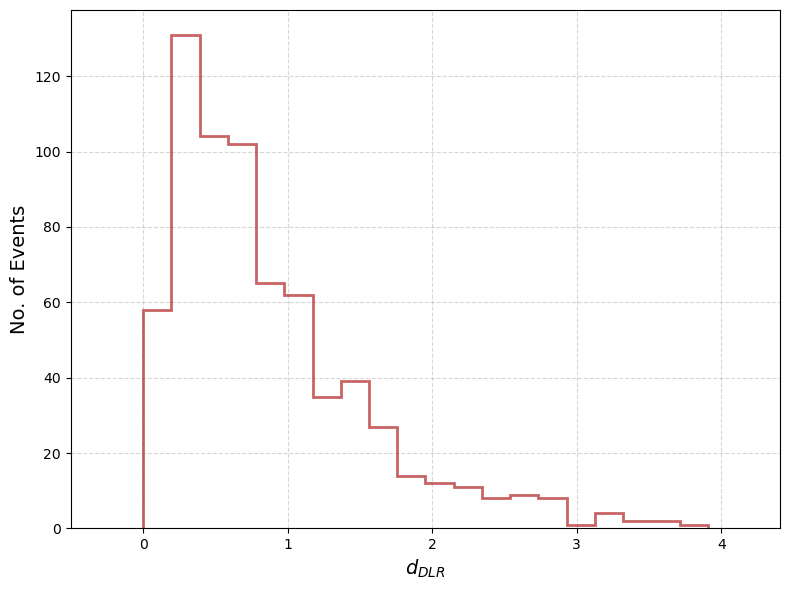

In [559]:


# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(dDLR, bins=20, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(dDLR) - 0.5, np.max(dDLR) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'$d_{DLR}$', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


dDLR<1

In [560]:


#find median of [OII]
oII_dDLR_lt1= dDLR_lt1['LOG_OII']
med_oII_dDLR_lt1= med_oII

#split data into two
oII_dDLR_lt1_bm = dDLR_lt1[oII_dDLR_lt1 <= med_oII]
oII_dDLR_lt1_am = dDLR_lt1[oII_dDLR_lt1 > med_oII]
oII_dDLR_lt1_bm

#extract axis for plot
#y axis for plot
dmu_dDLR_lt1= dDLR_lt1['delta_mu']
#x axis for plot
oII_dDLR_lt1= dDLR_lt1['LOG_OII']

#weighted average for below median 
oII_values_bm_dDLR_lt1 = oII_dDLR_lt1_bm['delta_mu']
oII_weights_bm_dDLR_lt1 = oII_dDLR_lt1_bm['MUERR']
oII_wa_bm_dDLR_lt1 = weighted_average(oII_values_bm_dDLR_lt1, oII_weights_bm_dDLR_lt1)
print(f"[OII] The weighted average below median for dDLR<1 is: {oII_wa_bm_dDLR_lt1}")
#weighted average for above median
oII_values_am_dDLR_lt1 = oII_dDLR_lt1_am['delta_mu']
oII_weights_am_dDLR_lt1 = oII_dDLR_lt1_am['MUERR']
oII_wa_am_dDLR_lt1 = weighted_average(oII_values_am_dDLR_lt1, oII_weights_am_dDLR_lt1)
print(f"[OII] The weighted average above median for dDLR<1 is: {oII_wa_am_dDLR_lt1}")

#uncertainty for below median
oII_bootstrap_bm_dDLR_lt1 = create_bootstrap_samples_weighted(oII_dDLR_lt1_bm, 'delta_mu', 'MUERR')
oII_std_bm_dDLR_lt1= np.std(oII_bootstrap_bm_dDLR_lt1)
print("[OII] uncertainty for below median for dDLR<1 data:", oII_std_bm_dDLR_lt1)
#uncertainty for above median
oII_bootstrap_am_dDLR_lt1 = create_bootstrap_samples_weighted(oII_dDLR_lt1_am, 'delta_mu', 'MUERR')
oII_std_am_dDLR_lt1= np.std(oII_bootstrap_am_dDLR_lt1)
print("[OII] uncertainty for above median for dDLR<1 data:", oII_std_am_dDLR_lt1)


#find corresponding x axis (median)
oIImed_bm_dDLR_lt1=oII_dDLR_lt1_bm['LOG_OII']
oII_x_bm_dDLR_lt1= np.median(oIImed_bm_dDLR_lt1)
oIImed_am_dDLR_lt1=oII_dDLR_lt1_am['LOG_OII']
oII_x_am_dDLR_lt1= np.median(oIImed_am_dDLR_lt1)


#calculate the difference of hubble residuals
oII_step_dDLR_lt1= abs(oII_wa_bm_dDLR_lt1 - oII_wa_am_dDLR_lt1)
oII_step_err_dDLR_lt1= np.sqrt((oII_std_am_dDLR_lt1)**2 + (oII_std_bm_dDLR_lt1)**2)
print("[OII] hubble residual diff for dDLR<1:", oII_step_dDLR_lt1)
print("[OII] the error of hubble residual diff for dDLR<1:", oII_step_err_dDLR_lt1)




[OII] The weighted average below median for dDLR<1 is: -0.04421787198505889
[OII] The weighted average above median for dDLR<1 is: 0.04368692882761477
[OII] uncertainty for below median for dDLR<1 data: 0.010971410808717424
[OII] uncertainty for above median for dDLR<1 data: 0.011898821900240763
[OII] hubble residual diff for dDLR<1: 0.08790480081267366
[OII] the error of hubble residual diff for dDLR<1: 0.016184987418817808


dDLR>1

In [561]:
#find median of [OII]
oII_dDLR_gt1= dDLR_gt1['LOG_OII']
med_oII_dDLR_gt1= med_oII
oII_dDLR_gt1_bm = dDLR_gt1[oII_dDLR_gt1 <= med_oII]
oII_dDLR_gt1_am = dDLR_gt1[oII_dDLR_gt1 > med_oII]

#extract axis for plot
#y axis for plot
dmu_dDLR_gt1= dDLR_gt1['delta_mu']
#x axis for plot
oII_dDLR_gt1= dDLR_gt1['LOG_OII']

#weighted average for below median 
oII_values_bm_dDLR_gt1 = oII_dDLR_gt1_bm['delta_mu']
oII_weights_bm_dDLR_gt1 = oII_dDLR_gt1_bm['MUERR']
oII_wa_bm_dDLR_gt1 = weighted_average(oII_values_bm_dDLR_gt1, oII_weights_bm_dDLR_gt1)
print(f"[OII] The weighted average below median for dDLR<1 is: {oII_wa_bm_dDLR_gt1}")
#weighted average for above median
oII_values_am_dDLR_gt1 = oII_dDLR_gt1_am['delta_mu']
oII_weights_am_dDLR_gt1 = oII_dDLR_gt1_am['MUERR']
oII_wa_am_dDLR_gt1 = weighted_average(oII_values_am_dDLR_gt1, oII_weights_am_dDLR_gt1)
print(f"[OII] The weighted average above median for dDLR < 1 is: {oII_wa_am_dDLR_gt1}")

#uncertainty for below median
oII_bootstrap_bm_dDLR_gt1 = create_bootstrap_samples_weighted(oII_dDLR_gt1_bm, 'delta_mu', 'MUERR')
oII_std_bm_dDLR_gt1= np.std(oII_bootstrap_bm_dDLR_gt1)
print("[OII] uncertainty for below median for dDLR<1 data:", oII_std_bm_dDLR_gt1)
#uncertainty for above median
oII_bootstrap_am_dDLR_gt1 = create_bootstrap_samples_weighted(oII_dDLR_gt1_am, 'delta_mu', 'MUERR')
oII_std_am_dDLR_gt1= np.std(oII_bootstrap_am_dDLR_gt1)
print("[OII] uncertainty for above median for dDLR<1 data:", oII_std_am_dDLR_gt1)

#find corresponding x axis (median)
oIImed_bm_dDLR_gt1=oII_dDLR_gt1_bm['LOG_OII']
oII_x_bm_dDLR_gt1= np.median(oIImed_bm_dDLR_gt1)
oIImed_am_dDLR_gt1=oII_dDLR_gt1_am['LOG_OII']
oII_x_am_dDLR_gt1= np.median(oIImed_am_dDLR_gt1)

#calculate the difference of hubble residuals
oII_step_dDLR_gt1= oII_wa_am_dDLR_gt1 - oII_wa_bm_dDLR_gt1
oII_step_err_dDLR_gt1= np.sqrt((oII_std_am_dDLR_gt1)**2 + (oII_std_bm_dDLR_gt1)**2)
print("[OII] hubble residual diff for dDLR>1:", oII_step_dDLR_gt1)
print("[OII] the error of hubble residual diff for dDLR>1:", oII_step_err_dDLR_gt1)




[OII] The weighted average below median for dDLR<1 is: -0.030176795316169618
[OII] The weighted average above median for dDLR < 1 is: 0.02597002575043934
[OII] uncertainty for below median for dDLR<1 data: 0.013827481501486253
[OII] uncertainty for above median for dDLR<1 data: 0.012131452395819987
[OII] hubble residual diff for dDLR>1: 0.056146821066608954
[OII] the error of hubble residual diff for dDLR>1: 0.01839487379423928


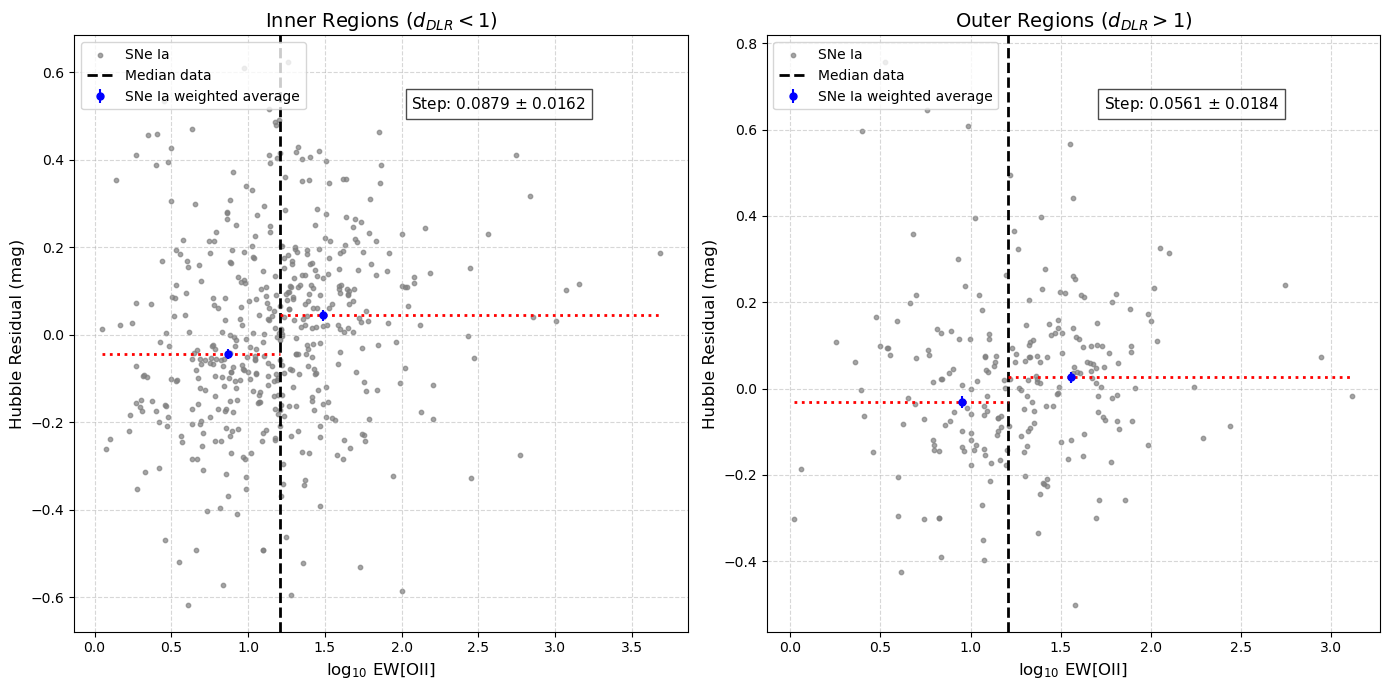

In [562]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First subplot (left panel) for dDLR < 1
ax1.scatter(oII_dDLR_lt1, dmu_dDLR_lt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=12)
ax1.set_ylabel(r'Hubble Residual (mag)', fontsize=12)
ax1.axvline(x=med_oII_dDLR_lt1, color='black', linestyle='--', lw=2, label='Median data')
ax1.hlines(oII_wa_bm_dDLR_lt1, xmin=oII_dDLR_lt1.min(), xmax=med_oII_dDLR_lt1, color='red', linestyle=':', lw=2)
ax1.hlines(oII_wa_am_dDLR_lt1, xmin=med_oII_dDLR_lt1, xmax=oII_dDLR_lt1.max(), color='red', linestyle=':', lw=2)
ax1.errorbar(oII_x_bm_dDLR_lt1, oII_wa_bm_dDLR_lt1, yerr=oII_std_bm_dDLR_lt1, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
ax1.errorbar(oII_x_am_dDLR_lt1, oII_wa_am_dDLR_lt1, yerr=oII_std_am_dDLR_lt1, fmt='o', color='blue', markersize=5)
ax1.set_title(r'Inner Regions ($d_{DLR} < 1$)', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper left', fontsize=10)
ax1.text(0.55, 0.9, rf'Step: {oII_step_dDLR_lt1:.4f} $\pm$ {oII_step_err_dDLR_lt1:.4f}', 
         transform=ax1.transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot (right panel) for dDLR > 1
ax2.scatter(oII_dDLR_gt1, dmu_dDLR_gt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=12)
ax2.set_ylabel(r'Hubble Residual (mag)', fontsize=12)
ax2.axvline(x=med_oII_dDLR_gt1, color='black', linestyle='--', lw=2, label='Median data')
ax2.hlines(oII_wa_bm_dDLR_gt1, xmin=oII_dDLR_gt1.min(), xmax=med_oII_dDLR_gt1, color='red', linestyle=':', lw=2)
ax2.hlines(oII_wa_am_dDLR_gt1, xmin=med_oII_dDLR_gt1, xmax=oII_dDLR_gt1.max(), color='red', linestyle=':', lw=2)
ax2.errorbar(oII_x_bm_dDLR_gt1, oII_wa_bm_dDLR_gt1, yerr=oII_std_bm_dDLR_gt1, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
ax2.errorbar(oII_x_am_dDLR_gt1, oII_wa_am_dDLR_gt1, yerr=oII_std_am_dDLR_gt1, fmt='o', color='blue', markersize=5)
ax2.set_title(r'Outer Regions ($d_{DLR} > 1$)', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper left', fontsize=10)
ax2.text(0.55, 0.9, rf'Step: {oII_step_dDLR_gt1:.4f} $\pm$ {oII_step_err_dDLR_gt1:.4f}', 
         transform=ax2.transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap and improve clarity

plt.tight_layout()
# Save plot as a PNG file (overwrite if exists)
file_pathdlr = 'hubble_residuals_vs_oII_combined.png'
if os.path.isfile(file_pathdlr):
    os.remove(file_pathdlr)
plt.savefig(file_pathdlr, dpi=300)
plt.show()


In [563]:
#calculating sigma
sigma_ddlr= (oII_step_dDLR_lt1 - oII_step_dDLR_gt1)/np.sqrt(oII_step_err_dDLR_gt1**2 + oII_step_err_dDLR_lt1**2)
print(sigma_ddlr)

1.2961628818079762


# EVALUATING DATA FOR DIFFERENCE REDSHIFT

In [564]:
#splitting data based on redshift value
z= df_merged['SPECZ']
med_z= np.median(z)
z_ltm= df_merged[z < med_z]
z_gtm= df_merged[z >= med_z]
z_gtm['SPECZ']
print(np.min(z))

0.0599899999797344


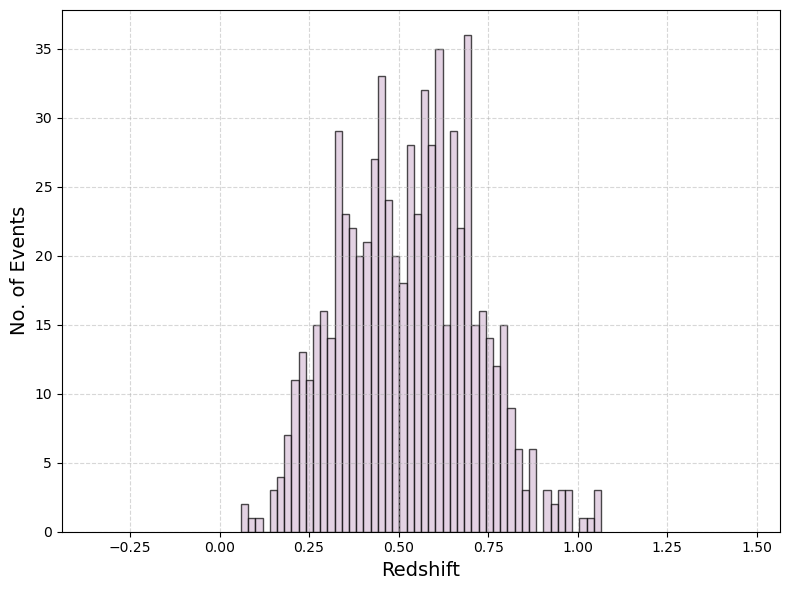

In [565]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(z, bins=50, edgecolor='black', alpha=0.7, color='thistle')

# Set x-axis limits if needed
plt.xlim(np.min(z) - 0.5, np.max(z) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Redshift', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
# Save plot as a PNG file (overwrite if exists)
file_pathnumz = 'redshiftcounts.png'
if os.path.isfile(file_pathnumz):
    os.remove(file_pathnumz)
plt.savefig(file_pathnumz, dpi=300)
plt.show()

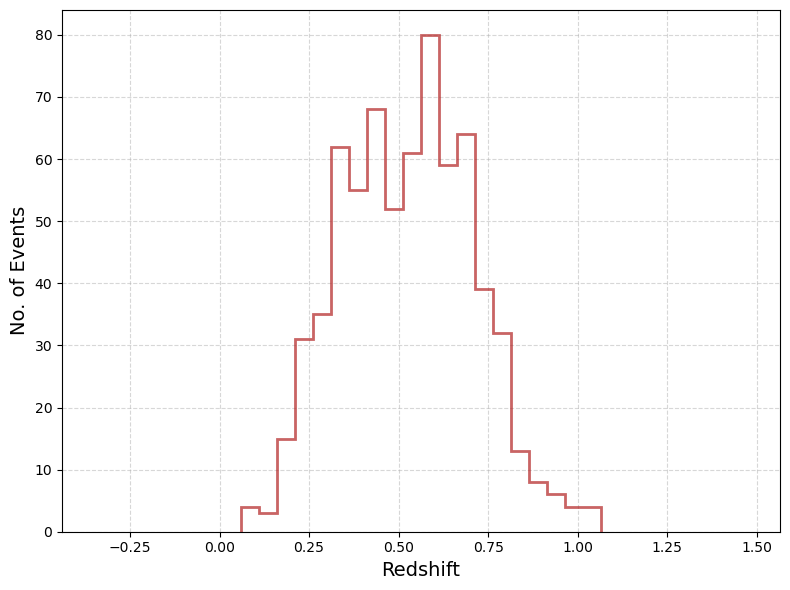

In [566]:


# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(z, bins=20, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(z) - 0.5, np.max(z) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Redshift', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


z<median

In [567]:
#find median of [OII]
oII_z_ltm= z_ltm['LOG_OII']
med_oII_z_ltm= med_oII
print(med_oII_z_ltm)

#split data into two
oII_z_ltm_bm = z_ltm[oII_z_ltm <= med_oII_z_ltm]
oII_z_ltm_am = z_ltm[oII_z_ltm > med_oII_z_ltm]
oII_z_ltm_bm

#extract axis for plot
#y axis for plot
dmu_z_ltm= z_ltm['delta_mu']
#x axis for plot
oII_z_ltm= z_ltm['LOG_OII']

#weighted average for below median 
oII_values_bm_z_ltm = oII_z_ltm_bm['delta_mu']
oII_weights_bm_z_ltm = oII_z_ltm_bm['MUERR']
oII_wa_bm_z_ltm = weighted_average(oII_values_bm_z_ltm, oII_weights_bm_z_ltm)
print(f"[OII] The weighted average below median for z<med_z is: {oII_wa_bm_z_ltm}")
#weighted average for above median
oII_values_am_z_ltm = oII_z_ltm_am['delta_mu']
oII_weights_am_z_ltm = oII_z_ltm_am['MUERR']
oII_wa_am_z_ltm = weighted_average(oII_values_am_z_ltm, oII_weights_am_z_ltm)
print(f"[OII] The weighted average above median for z<med_z is: {oII_wa_am_z_ltm}")

#uncertainty for below median
oII_bootstrap_bm_z_ltm = create_bootstrap_samples_weighted(oII_z_ltm_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_ltm= np.std(oII_bootstrap_bm_z_ltm)
print("[OII] uncertainty for below median for z<med_z data:", oII_std_bm_z_ltm)
#uncertainty for above median
oII_bootstrap_am_z_ltm = create_bootstrap_samples_weighted(oII_z_ltm_am, 'delta_mu', 'MUERR')
oII_std_am_z_ltm= np.std(oII_bootstrap_am_z_ltm)
print("[OII] uncertainty for above median for z<med_z data:", oII_std_am_z_ltm)

#find corresponding x axis (median)
oIImed_bm_z_ltm=oII_z_ltm_bm['LOG_OII']
oII_x_bm_z_ltm= np.median(oIImed_bm_z_ltm)
oIImed_am_z_ltm=oII_z_ltm_am['LOG_OII']
oII_x_am_z_ltm= np.median(oIImed_am_z_ltm)

#calculate the difference of hubble residuals
oII_step_z_ltm= abs(oII_wa_bm_z_ltm - oII_wa_am_z_ltm)
oII_step_err_z_ltm= np.sqrt((oII_std_am_z_ltm)**2 + (oII_std_bm_z_ltm)**2)
print("[OII] hubble residual diff for z<med_z:", oII_step_z_ltm)
print("[OII] the error of hubble residual diff for z<med_z:", oII_step_err_z_ltm)




1.2074339314320817
[OII] The weighted average below median for z<med_z is: -0.04817878414677373
[OII] The weighted average above median for z<med_z is: 0.04590201053740305
[OII] uncertainty for below median for z<med_z data: 0.010275788977712114
[OII] uncertainty for above median for z<med_z data: 0.01032739953889992
[OII] hubble residual diff for z<med_z: 0.09408079468417678
[OII] the error of hubble residual diff for z<med_z: 0.014568700022669835


z>median

In [568]:
#find median of [OII]
oII_z_gtm= z_gtm['LOG_OII']
med_oII_z_gtm= med_oII

#split data into two
oII_z_gtm_bm = z_gtm[oII_z_gtm <= med_oII_z_gtm]
oII_z_gtm_am = z_gtm[oII_z_gtm > med_oII_z_gtm]

#extract axis for plot
#y axis for plot
dmu_z_gtm= z_gtm['delta_mu']
#x axis for plot
oII_z_gtm= z_gtm['LOG_OII']

#weighted average for below median 
oII_values_bm_z_gtm = oII_z_gtm_bm['delta_mu']
oII_weights_bm_z_gtm = oII_z_gtm_bm['MUERR']
oII_wa_bm_z_gtm = weighted_average(oII_values_bm_z_gtm, oII_weights_bm_z_gtm)
print(f"[OII] The weighted average below median for z>med_z is: {oII_wa_bm_z_gtm}")
#weighted average for above median
oII_values_am_z_gtm = oII_z_gtm_am['delta_mu']
oII_weights_am_z_gtm = oII_z_gtm_am['MUERR']
oII_wa_am_z_gtm = weighted_average(oII_values_am_z_gtm, oII_weights_am_z_gtm)
print(f"[OII] The weighted average above median for z>med_z is: {oII_wa_am_z_gtm}")

#uncertainty for below median
oII_bootstrap_bm_z_gtm = create_bootstrap_samples_weighted(oII_z_gtm_bm, 'delta_mu', 'MUERR')
oII_std_bm_z_gtm= np.std(oII_bootstrap_bm_z_gtm)
print("[OII] uncertainty for below median for z>med_z data:", oII_std_bm_z_gtm)
#uncertainty for above median
oII_bootstrap_am_z_gtm = create_bootstrap_samples_weighted(oII_z_gtm_am, 'delta_mu', 'MUERR')
oII_std_am_z_gtm= np.std(oII_bootstrap_am_z_gtm)
print("[OII] uncertainty for above median for z>med_z data:", oII_std_am_z_gtm)

#find corresponding x axis (median)
oIImed_bm_z_gtm=oII_z_gtm_bm['LOG_OII']
oII_x_bm_z_gtm= np.median(oIImed_bm_z_gtm)
oIImed_am_z_gtm=oII_z_gtm_am['LOG_OII']
oII_x_am_z_gtm= np.median(oIImed_am_z_gtm)

#calculate the difference of hubble residuals
oII_step_z_gtm= abs(oII_wa_bm_z_gtm - oII_wa_am_z_gtm)
oII_step_err_z_gtm= np.sqrt((oII_std_am_z_gtm)**2 + (oII_std_bm_z_gtm)**2)
print("[OII] hubble residual diff for z>med_z:", oII_step_z_gtm)
print("[OII] the error of hubble residual diff for z>med_z:", oII_step_err_z_gtm)




[OII] The weighted average below median for z>med_z is: -0.02244294710309354
[OII] The weighted average above median for z>med_z is: 0.015644439528319454
[OII] uncertainty for below median for z>med_z data: 0.016131046670636497
[OII] uncertainty for above median for z>med_z data: 0.015615823228217765
[OII] hubble residual diff for z>med_z: 0.03808738663141299
[OII] the error of hubble residual diff for z>med_z: 0.02245138307065287


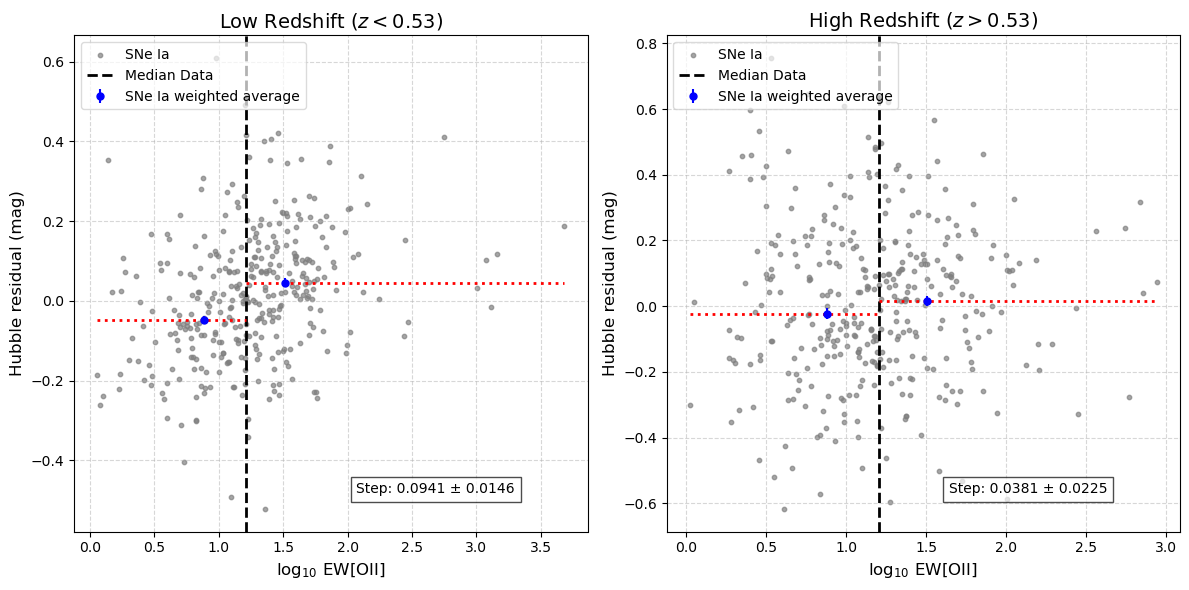

In [569]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (left panel) for low redshift
ax1.scatter(oII_z_ltm, dmu_z_ltm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=12)
ax1.set_ylabel(r'Hubble residual (mag)', fontsize=12)
ax1.axvline(x=med_oII_z_ltm, color='black', linestyle='--', lw=2, label='Median Data')
ax1.hlines(oII_wa_bm_z_ltm, xmin=oII_z_ltm.min(), xmax=med_oII_z_ltm, color='red', linestyle=':', lw=2)  # Left side
ax1.hlines(oII_wa_am_z_ltm, xmin=med_oII_z_ltm, xmax=oII_z_ltm.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
ax1.errorbar(oII_x_bm_z_ltm, oII_wa_bm_z_ltm, yerr=oII_std_bm_z_ltm, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
ax1.errorbar(oII_x_am_z_ltm, oII_wa_am_z_ltm, yerr=oII_std_am_z_ltm, fmt='o', color='blue', markersize=5)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title(r'Low Redshift ($z < 0.53$)', fontsize=14)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax1.grid(True, linestyle='--', alpha=0.5)
# Custom text annotation for the step
ax1.text(0.55, 0.1, f'Step: {oII_step_z_ltm:.4f} ± {oII_step_err_z_ltm:.4f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot (right panel) for high redshift
ax2.scatter(oII_z_gtm, dmu_z_gtm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel(r'$\log_{10} \, \mathrm{EW[OII]}$', fontsize=12)
ax2.set_ylabel(r'Hubble residual (mag)', fontsize=12)
ax2.axvline(x=med_oII_z_gtm, color='black', linestyle='--', lw=2, label='Median Data')
ax2.hlines(oII_wa_bm_z_gtm, xmin=oII_z_gtm.min(), xmax=med_oII_z_gtm, color='red', linestyle=':', lw=2)  # Left side
ax2.hlines(oII_wa_am_z_gtm, xmin=med_oII_z_gtm, xmax=oII_z_gtm.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
ax2.errorbar(oII_x_bm_z_gtm, oII_wa_bm_z_gtm, yerr=oII_std_bm_z_gtm, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
ax2.errorbar(oII_x_am_z_gtm, oII_wa_am_z_gtm, yerr=oII_std_am_z_gtm, fmt='o', color='blue', markersize=5)

ax2.set_title(r'High Redshift ($z > 0.53$)', fontsize=14)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax2.grid(True, linestyle='--', alpha=0.5)
# Custom text annotation for the step
ax2.text(0.55, 0.1, f'Step: {oII_step_z_gtm:.4f} ± {oII_step_err_z_gtm:.4f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save plot as a PNG file
file_pathz = 'hubble_residuals_vs_oII_redshift.png'
if os.path.isfile(file_pathz):
    os.remove(file_pathz)
plt.savefig(file_pathz, dpi=300)

# Show the plot
plt.show()

In [570]:
sigma_z= (oII_step_z_ltm - oII_step_z_gtm)/np.sqrt(oII_step_err_z_gtm**2 + oII_step_err_z_ltm**2)
print(sigma_z)

2.09211668434142


# ANALYZING FOR 4 REDSHIFT BINS

In [571]:
""" Foundation sample"""

#find median of [oII]
oIIF= dff1_main_non_nan['OII_EW']
med_oIIF= np.median(oIIF)
print(med_oIIF)

#split data into two
oIIF_bm = dff1_main_non_nan[oIIF <= med_oIIF]
oIIF_am = dff1_main_non_nan[oIIF > med_oIIF]

# [mass] weighted average for below median 
oIIF_values_bm = oIIF_bm['mu_res_x1_c']
oIIF_weights_bm = oIIF_bm['mu_err_x1_c']
oIIF_wa_bm = weighted_average(oIIF_values_bm, oIIF_weights_bm)
print(f"[OII]The weighted average below median is: {oIIF_wa_bm}")
#weighted average for above median
oIIF_values_am = oIIF_am['mu_res_x1_c']
oIIF_weights_am = oIIF_am['mu_err_x1_c']
oIIF_wa_am = weighted_average(oIIF_values_am, oIIF_weights_am)
print(f"[OII] The weighted average above median is: {oIIF_wa_am}")

# [OII] uncertainty for below median
oIIFbootstrap_bm = create_bootstrap_samples_weighted(oIIF_bm, 'mu_res_x1_c', 'mu_err_x1_c')
oIIF_std_bm= np.std(oIIFbootstrap_bm)
print("[OII] uncertainty for below median data:", oIIF_std_bm)
#uncertainty for above median
oIIFbootstrap_am = create_bootstrap_samples_weighted(oIIF_am, 'mu_res_x1_c', 'mu_err_x1_c')
oIIF_std_am= np.std(oIIFbootstrap_am)
print("[OII] uncertainty for above median data:", oIIF_std_am)

#find corresponding x axis (median)
oIIFx_bm=oIIF_bm['OII_EW']
oIIF_x_bm= np.median(oIIFx_bm)
oIIFx_am=oIIF_am['OII_EW']
oIIF_x_am= np.median(oIIFx_am)

#extract axis for plot
#y axis for plot
dmuf=dff1_main_non_nan['mu_res_x1_c']
#x axis for plot
oIIf= dff1_main_non_nan['OII_EW']

#calculate the difference of hubble residuals
oIIF_step= oIIF_wa_bm - oIIF_wa_am
oIIF_step_err= np.sqrt((oIIF_std_am)**2 + (oIIF_std_bm)**2)
print("[OII] hubble residual diff:", oIIF_step)
print("[OII] the error of hubble residual diff:", oIIF_step_err)
# %%

3.20071467
[OII]The weighted average below median is: -0.034936197876557926
[OII] The weighted average above median is: 0.05989666268715854
[OII] uncertainty for below median data: 0.02821666428696562
[OII] uncertainty for above median data: 0.027176267975037378
[OII] hubble residual diff: -0.09483286056371647
[OII] the error of hubble residual diff: 0.03917562615369872


OzDES data

In [572]:
#splitting data based on redshift value
z= df_merged['zHD']
print(np.max(z))
q1_z=np.percentile(z, 25)
#q1_z_med=np.median(q1_z)
med_z= np.percentile(z,50)
q3_z=np.percentile(z,75)
print(q1_z, med_z, q3_z)
#%%
reg1= df_merged[z < q1_z]
reg1_z_med = np.median(reg1['zHD'])
reg2 = df_merged[(z >= q1_z) & (z < med_z)]
reg2_z_med = np.median(reg2['zHD'])
reg3 = df_merged[(z >= med_z) & (z < q3_z)]
reg3_z_med = np.median(reg3['zHD'])
reg4= df_merged[z>=q3_z]
reg4_z_med = np.median(reg4['zHD'])


#%%
"""OII"""
#find median of each region
#region 1
oII_z_reg1= reg1['LOG_OII']
med_oII_z_reg1= med_oII
#split data into two
oII_z_reg1_bm = reg1[oII_z_reg1 <= med_oII_z_reg1]
oII_z_reg1_am = reg1[oII_z_reg1 > med_oII_z_reg1]
#region 2
oII_z_reg2= reg2['LOG_OII']
med_oII_z_reg2= med_oII
#split data into two
oII_z_reg2_bm = reg2[oII_z_reg2 <= med_oII_z_reg2]
oII_z_reg2_am = reg2[oII_z_reg2 > med_oII_z_reg2]
#region 3
oII_z_reg3= reg3['LOG_OII']
med_oII_z_reg3= med_oII
#split data into two
oII_z_reg3_bm = reg3[oII_z_reg3 <= med_oII_z_reg3]
oII_z_reg3_am = reg3[oII_z_reg3 > med_oII_z_reg3]
#region 4
oII_z_reg4= reg4['LOG_OII']
med_oII_z_reg4= med_oII
#split data into two
oII_z_reg4_bm = reg4[oII_z_reg4 <= med_oII_z_reg4]
oII_z_reg4_am = reg4[oII_z_reg4 > med_oII_z_reg4]
# %%
#region1
#weighted average for below median 
mass_values_bm_z_reg1 = oII_z_reg1_bm['delta_mu']
mass_weights_bm_z_reg1 = oII_z_reg1_bm['MUERR']
mass_wa_bm_z_reg1 = weighted_average(mass_values_bm_z_reg1, mass_weights_bm_z_reg1)
print(f"[MASS] The weighted average below median for reg1 is: {mass_wa_bm_z_reg1}")
#weighted average for above median
mass_values_am_z_reg1 = oII_z_reg1_am['delta_mu']
mass_weights_am_z_reg1 = oII_z_reg1_am['MUERR']
mass_wa_am_z_reg1 = weighted_average(mass_values_am_z_reg1, mass_weights_am_z_reg1)
print(f"[MASS] The weighted average above median for reg1 is: {mass_wa_am_z_reg1}")
#region2
#weighted average for below median 
mass_values_bm_z_reg2 = oII_z_reg2_bm['delta_mu']
mass_weights_bm_z_reg2 = oII_z_reg2_bm['MUERR']
mass_wa_bm_z_reg2 = weighted_average(mass_values_bm_z_reg2, mass_weights_bm_z_reg2)
print(f"[MASS] The weighted average below median for reg2 is: {mass_wa_bm_z_reg2}")
#weighted average for above median
mass_values_am_z_reg2 = oII_z_reg2_am['delta_mu']
mass_weights_am_z_reg2 = oII_z_reg2_am['MUERR']
mass_wa_am_z_reg2 = weighted_average(mass_values_am_z_reg2, mass_weights_am_z_reg2)
print(f"[MASS] The weighted average above median for reg2 is: {mass_wa_am_z_reg2}")
#region3
#weighted average for below median 
mass_values_bm_z_reg3 = oII_z_reg3_bm['delta_mu']
mass_weights_bm_z_reg3 = oII_z_reg3_bm['MUERR']
mass_wa_bm_z_reg3 = weighted_average(mass_values_bm_z_reg3, mass_weights_bm_z_reg3)
print(f"[MASS] The weighted average below median for reg3 is: {mass_wa_bm_z_reg3}")
#weighted average for above median
mass_values_am_z_reg3 = oII_z_reg3_am['delta_mu']
mass_weights_am_z_reg3 = oII_z_reg3_am['MUERR']
mass_wa_am_z_reg3 = weighted_average(mass_values_am_z_reg3, mass_weights_am_z_reg3)
print(f"[MASS] The weighted average above median for reg3 is: {mass_wa_am_z_reg3}")
#region4
#weighted average for below median 
mass_values_bm_z_reg4 = oII_z_reg4_bm['delta_mu']
mass_weights_bm_z_reg4 = oII_z_reg4_bm['MUERR']
mass_wa_bm_z_reg4 = weighted_average(mass_values_bm_z_reg4, mass_weights_bm_z_reg4)
print(f"[MASS] The weighted average below median for reg4 is: {mass_wa_bm_z_reg4}")
#weighted average for above median
mass_values_am_z_reg4 = oII_z_reg4_am['delta_mu']
mass_weights_am_z_reg4 = oII_z_reg4_am['MUERR']
mass_wa_am_z_reg4 = weighted_average(mass_values_am_z_reg4, mass_weights_am_z_reg4)
print(f"[MASS] The weighted average above median for reg4 is: {mass_wa_am_z_reg4}")
# %%
print(mass_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
mass_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(oII_z_reg1_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg1= np.std(mass_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(oII_z_reg1_bm['MUERR'].values)
#%%
print("[MASS] uncertainty for below median for reg1 data:", mass_std_bm_z_reg1)
#%%
#uncertainty for above median
mass_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(oII_z_reg1_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg1= np.std(mass_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(oII_z_reg1_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg1 data:", mass_std_am_z_reg1)
#region2
#uncertainty for below median
mass_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(oII_z_reg2_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg2= np.std(mass_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(oII_z_reg2_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg2 data:", mass_std_bm_z_reg2)
#uncertainty for above median
mass_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(oII_z_reg2_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg2= np.std(mass_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(oII_z_reg2_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg2 data:", mass_std_am_z_reg2)
#region3
#uncertainty for below median
mass_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(oII_z_reg3_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg3= np.std(mass_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(oII_z_reg3_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg3 data:", mass_std_bm_z_reg3)
#uncertainty for above median
mass_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(oII_z_reg3_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg3= np.std(mass_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(oII_z_reg3_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg3 data:", mass_std_am_z_reg3)
#region4
#uncertainty for below median
mass_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(oII_z_reg4_bm, 'delta_mu', 'MUERR')
mass_std_bm_z_reg4= np.std(mass_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(oII_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", mass_std_bm_z_reg4)
#uncertainty for above median
mass_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(oII_z_reg4_am, 'delta_mu', 'MUERR')
mass_std_am_z_reg4= np.std(mass_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(oII_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:", mass_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
mass_step_z_reg1= mass_wa_bm_z_reg1 - mass_wa_am_z_reg1
mass_step_err_z_reg1= np.sqrt((mass_std_am_z_reg1)**2 + (mass_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
mass_step_z_reg2= mass_wa_bm_z_reg2 - mass_wa_am_z_reg2
mass_step_err_z_reg2= np.sqrt((mass_std_am_z_reg2)**2 + (mass_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", mass_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", mass_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
mass_step_z_reg3= mass_wa_bm_z_reg3 - mass_wa_am_z_reg3
mass_step_err_z_reg3= np.sqrt((mass_std_am_z_reg3)**2 + (mass_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
mass_step_z_reg4= mass_wa_bm_z_reg4 - mass_wa_am_z_reg4
mass_step_err_z_reg4= np.sqrt((mass_std_am_z_reg4)**2 + (mass_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", mass_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4", mass_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

1.0642
0.38216 0.52973 0.6591549999999999
[MASS] The weighted average below median for reg1 is: -0.04770811942670427
[MASS] The weighted average above median for reg1 is: 0.056325210679059996
[MASS] The weighted average below median for reg2 is: -0.0491605673369629
[MASS] The weighted average above median for reg2 is: 0.02653393336424825
[MASS] The weighted average below median for reg3 is: -0.02880815737050669
[MASS] The weighted average above median for reg3 is: 0.012862594937151271
[MASS] The weighted average below median for reg4 is: -0.01777628943997821
[MASS] The weighted average above median for reg4 is: 0.026775018111302718
9      0.16339
30     0.12008
42     0.13362
54     0.13504
58     0.14481
        ...   
638    0.13790
667    0.12366
668    0.13294
671    0.12934
685    0.12507
Name: MUERR, Length: 85, dtype: float64
[MASS] uncertainty for below median for reg1 data: 0.01195292257971522
[MASS] uncertainty for above median for reg1 data: 0.012936288881906677
[MASS] uncer

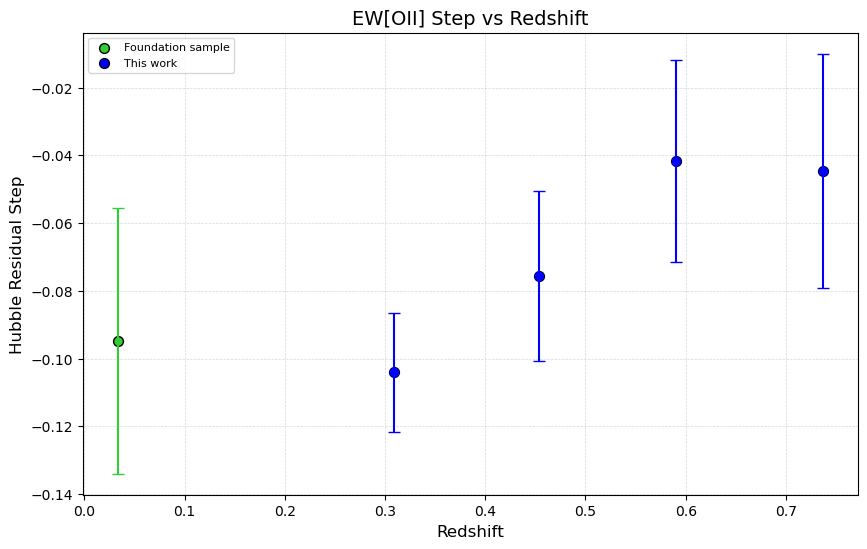

In [573]:
plt.figure(figsize=(10, 6))

# Plotting the Foundation sample
plt.scatter(med_redshift, oIIF_step, color='limegreen', label=r'Foundation sample', s=50, edgecolor='black')
plt.errorbar(med_redshift, oIIF_step, yerr=oIIF_step_err, color='limegreen', capsize=4)

# Plotting OzDES data
ozdes_data = [
    (reg1_z_med, mass_step_z_reg1, mass_step_err_z_reg1),
    (reg2_z_med, mass_step_z_reg2, mass_step_err_z_reg2),
    (reg3_z_med, mass_step_z_reg3, mass_step_err_z_reg3),
    (reg4_z_med, mass_step_z_reg4, mass_step_err_z_reg4),
]

for z_med, oII_step_z, err in ozdes_data:
    plt.scatter(z_med, oII_step_z, color='blue', s=50, edgecolor='black', label=r'This work' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, oII_step_z, yerr=err, fmt='o', color='blue', capsize=4)

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'EW[OII] Step vs Redshift', fontsize=14)

# Add grid
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)

# Adjust legend size and location
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'oII_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot